# 07. 요인배치법
- 모든 요인의 각각의 수준조합에서 실험이 이루어지므로, 여러 요인의 주효과와 상호작용효과를 동시에 추정

<br>

## 07.01. 요인배치법 (factorial design)
- 모든 요인의 각각의 수준조합에서 실험이 이루어짐
    - **$2^n$요인배치법은 2수준인 요인을 n개 선택하여 모든 수준조합에서 랜덤한 순서대로 실험이 이루어짐 (모든 요인이 고정요인)**
* 통상적인 다원배치법과 같음
- **$k^n$요인배치법은 요인의 수가 n이고, 각 요인의 수준이 k인 실험**
    - 모든 요인의 수준조합에서 실험이 랜덤한 순서대로 이루어짐
    

<br>

## 07.02. 대비와 직교분해
- 어떤 실험에서 $a$개의 처리조합 (treatment combination)을 고려할 때, 각 처리조합에서 측정값들의 합을 $T_1, \dots T_a$라 하고

    각 처리조합에서의 반복수를 일정하게 $r$이라고 하면 $T_1, \dots T_a$의 정수계수 일차식
    
    $$L = c_1T_1 + \dots c_a T_a$$를 선형식이라고 부름
    
    **이때 계수 $c_1, \dots, c_a$중에는 0이 몇개 있어도 괜찮지만, 전부 0이면 안됨**
    
    또한 $c_1 \sim c_a$의 제곱합을 $L$의 단위수 $D$는
    
    **$$D=\sum^a_i c^2_i$$이며, $c_1 + c_2 +\dots c_a=0$을 만족하는 조건이 나올때 이 선형식을 대비 (contrast)라고 부르며, 대비의 변동은**
    
    **$$SS_L = {{L^2}\over{D\times r}}$$주어지며 자유도 1을 가진다**
    
    <br>
    
    <hr>
    
    **2개의 대비가**
    
    $$L1 = c_1 T_1 + \dots c_a T_a$$
    
    **$$L2 = d_1 T_1 + \dots d_a T_a$$로 주어질 때**
    
    **$$c_1 d_1 + c_2 d_2 \dots c_a d_a = 0$$이 성립하면 2개의 대비 $L_1$과 $L_2$는 서로 직교 (orthogonal)함**
    
    이 때 대비 $L_1$의 변동과 $L_2$의 변동은
    
    $$SS_{L_1} = {{L^2_1}\over{\sum_i c_i^2\times r}}$$
    
    $$SS_{L_2} = {{L^2_2}\over{\sum_i d_i^2\times r}}$$로 주어지고, 둘 다 자유도 1을 가짐
    
    <br>
    
    <hr>
    
    **수준수가 a인 $A$의 변동 $SS_A$는 각각의 자유도가 1인 서로 직교하는 $(a-1)$개의 대비에 의한 변동으로 분해할 수 있으며,**
    
    **이때 서로 직교하는 대비를 $L_1, L_2 \dots ,L_{a-1}$라고 하면**
    
    $$SS_A = SS_{L_1} + \dots SS_{L_{a-1}}$$
    
    **이처럼 $A$의 변동을 몇 개의 직교하는 대비의 변동으로 분해하는 것을 $SS_A$의 직교분해라고 함**
    
    **변동을 직교하는 대비의 변동으로 분해하는 이유는, 어떤 특정한 대비의 변동이 전체 변동 중에서 얼마나 차지하는지 알아볼 수 있기 때문**

<br>

#### 플라스틱 제조 공장 예시
- 원료의 제조회사 $A$와 성형온도 $B$가 플라스틱 강도에 어떠한 영향을 미치는지 분석하기 위해 $3^2$요인배치법 적용

| $\;$ | $B_0$ | $B_1$ | $B_2$ | $T$$_{i.}$ |
| - | - | - | - | - |
| $A_0$ | 11 | 18| 25 | 54 |
| $A_1$ | 1 | 6| 14 | 21 |
| $A_2$ | 6 | 15| 18 | 39 |
| |
| $T_{.j}$ | 18 | 39| 57 | $T$=114 |

In [4]:
library(tidyverse)
library(tidymodels)

In [5]:
gang <- c(11, 18, 25, 1, 6, 14, 6, 15, 18)
wol <- factor(c(rep(0, 3), rep(1, 3), rep(2, 3)))
temp <- factor(c(rep(c(0, 1, 2), 3)))
plastic.data <- tibble(gang, wol, temp)

In [6]:
plastic.data %>% pivot_wider(id_cols = wol, values_from = gang, names_from = temp) %>%
    row_number

ERROR: [1m[33mError[39m in `vec_c()`:[22m
[33m![39m Can't combine `wol` <factor<5da9e>> and `0` <double>.


<br>

- 분산분석 : 요인 $A$, $B$ 모두 특성값에 매우 유의한 영향을 미침

In [7]:
anova <- aov(gang ~ wol + temp, plastic.data)
tidy(anova)

term,df,sumsq,meansq,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
wol,2,182,91,45.5,0.0017728532
temp,2,254,127,63.5,0.0009323466
Residuals,4,8,2,NA,NA


<br>

- **$A$의 효과 분해** 

    $L_1$ : 국산과 외제의 차이 = ${1\over6} (T_{0.}+T_{1.})-{1\over3}T_{2.} = -0.5$
    
    $L_2$ : 자사와 국내 타 회사의 차이 = ${1\over3} T_{0.}-{1\over3}T_{1.} = 11$ 일때,
    
    2개의 선형식의 계수는 
    
    $$c_1 = 1/6,\;c_2 = 1/6,\;c_3 = -1/3$$
    
    **$$d_1 = 1/3.\;d_2 = -1/3.\;d_3 = 0$$이므로 선형식 $L_1, L_2$는 대비이며 서로 직교함**
    

In [8]:
c1 <- c(1/6, 1/6, -1/3)
c2 <- c(1/3, -1/3, 0)
mat.wol = cbind(c1, c2)
contrasts(plastic.data$wol) = mat.wol

In [9]:
print(plastic.data$wol)

[1] 0 0 0 1 1 1 2 2 2
attr(,"contrasts")
          c1         c2
0  0.1666667  0.3333333
1  0.1666667 -0.3333333
2 -0.3333333  0.0000000
Levels: 0 1 2


<br>

- **$B$의 효과분석**
    - **$B$ (온도)는 계량요인이고, 수준간격이 일정 ($B_0:100,\;B_1:110\;B_2:120$)하므로,**
    
        **요인 $B$의 1차효과 (linear effect)와 2차 효과 (quatratic effect)를 계산**
        
        <br>
    
    - **100, 110, 120에 걸쳐서 얻어지는 1차 효과는 100에서 110까지 변하는 동안의 1차효과 $(T_{.1}-T_{.0})$과**
    
        **110에서 120까지 변하는 동안의 1차효과 $(T_{.2}-T_{.1})$의 합으로 볼 수있으므로**
        
     **$L_l$ : $T_{.2}-T_{.0}=39$이고 $c_1 = -1, c_2 = 0, c_3 =1$이므로 대비**
     
     <br>
    
    - **100과 110간의 특성값 변화의 기울기와, 110에서 120간의 특성값 변화의 기울기의 차이는 2차 효과로 볼 수 있으므로**
    
        **2차 효과는**
    
     **$L_q$ : $(T_{.2}-T_{.1})- (T_{.1}-T_{.0}) =T_{.2}-2T_{.1}+T_{.0}=-3이고\;\;\; d_1 = 1, d_2 = -2, d_3 =1$이므로 대비**
    
    <hr>
    
     **$L_l과\;L_q$는 서로 직교**
    

In [10]:
c3 = c(-1, 0, 1)
c4 = c(1, -2, 1)
mat.temp = cbind(c3, c4)
contrasts(plastic.data$temp) = mat.temp

In [11]:
print(plastic.data$temp)

[1] 0 1 2 0 1 2 0 1 2
attr(,"contrasts")
  c3 c4
0 -1  1
1  0 -2
2  1  1
Levels: 0 1 2


<br>

* **$A$와 $B$의 변동분해**

    <br>
    
    - $SS_A$는 
    
        $$SS_A = SS_{L_1} + SS_{L_2}= 0.5 + 181.5 = 182$$로 분해되며,
    
        **$SS_{L_1} < SS_{L_2}$이므로, $A$에 의한 변동은 주로 자회사와 국내 타 회사 간의 차이 때문인 것을 알 수 있음**
        
    <br>
    
    - $SS_B$는 
    
        $$SS_B = SS_{l} + SS_{q}= 253.5 + 0.5 = 254$$로 분해되며,
    
        **$SS_{l} < SS_{q}$이므로, $B$에 의한 변동은 주로 1차 효과가 대부분을 차지하고 있음을 알 수 있음**

In [12]:
mod.contrast = aov(gang ~ wol + temp, plastic.data)
summary(mod.contrast, split = list(wol = list("국산과 외제" = 1, "자사와 국내 타 회사" = 2),
                                   temp = list("linear" = 1, "quatratic" = 2)))

                           Df Sum Sq Mean Sq F value   Pr(>F)    
wol                         2  182.0    91.0   45.50 0.001773 ** 
  wol: 국산과 외제          1    0.5     0.5    0.25 0.643330    
  wol: 자사와 국내 타 회사  1  181.5   181.5   90.75 0.000678 ***
temp                        2  254.0   127.0   63.50 0.000932 ***
  temp: linear              1  253.5   253.5  126.75 0.000355 ***
  temp: quatratic           1    0.5     0.5    0.25 0.643330    
Residuals                   4    8.0     2.0                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

<br>

## 07.03. $2^2$요인배치법

<br>

### 반복이 없는 경우
- **요인의 수가 2개이고, 각 요인의 수준이 2인 이원배치법**

| | $A_0$ | $A_1$ | $T_{.j}$ |
| - | - | - | - |
| $B_0$ | $x_{00}$ | $x_{10}$| $T_{.0}$|
| $B_1$ | $x_{01}$ | $x_{11}$| $T_{.1}$|
| |
| $T_{i.}$ | $T_{0.}$ | $T_{1.}$ | $T$ |

- 반복이 없는 $2^2$ 요인배치법에서는 $x_{ij}$를 $a^ib^j$로 표현

$$x_{00}=a^0 b^0 =(1)$$

$$x_{01}=a^0 b^1 =b$$

$$x_{10}=a^1 b^0 =a$$

$$x_{11}=a^1 b^1 =ab$$

- **$2^2$요인배치법의 처리조합은 사각형의 꼭지점으로 표현 가능**


<br>

#### 주효과

- 위의 표로부터 주효과와 상호작용효과를 정의
    
    **A의 주효과**
    
    $$A = {1\over2}(x_{11}+x_{10}-x_{01}-x_{00})$$
    
    $$= {1\over2}(ab + a - b -(1))$$
    
    $$={1\over2}(T_{1.}  -T_{0.})$$
    
    <br>
    
    **B의 주효과**
    
    $$B = {1\over2}(x_{11}+x_{01}-x_{10}-x_{00})$$
    
    $$= {1\over2}(ab + b - a -(1))$$
    
    $$={1\over2}(T_{.1}  -T_{.0})$$

<br>

#### 상호작용효과
- **특정한 요인의 수준조합에서 일어나는 효과**

- A의 효과가 B의 수준 변화에 따라 다른경우 $\rightarrow$ A, B사이에는 상호작용효과가 존재
    
    A, B간의 상호작용효과를 AB로 표시하면, A의 1수준에서 B의 효과는 $ab-a$이고,
    
    A의 0수준에서 B의 효과는 $b-(1)$이므로
    
    AB는 이들 차이의 평균
    
    $$AB = {1\over2}[(x_{11}-x_{10})-(x_{01}-x_{00})]={1\over2}(ab+(1)-a-b)$$
    
<br>

#### 상호작용효과와 주효과는 인수분해의 형태를 이용하여 다음과 같이 계산

$$A = {1\over2}(ab + a - b -(1))$$

$$B = {1\over2}(ab + b - a -(1))$$

$$AB = {1\over2}(ab+(1)-a-b)$$

<br>

| 처리조합 | A | B | AB | 
| - | - | - | - |
| $(1)$ | - | - | + |
| $a$ | + | - | - | 
| $b$ | - | + | - |
| $ab$ | + | + | + |

<br>

#### 요인효과와 변동
- $CT = {{T^2}\over{4}}$일 떄

$$SS_T = \sum_i \sum_j x^2_{ij} - CT$$

$$SS_A = \sum_i {{T^2_i}\over{2}} - CT = {1\over4}(T_i{i.}-T_{0.})^2 = (A)^2$$

$$SS_B = {1\over4}(T_i{.i}-T_{.0})^2 = (B)^2$$

$$SS_{A\times B} = SS_T - SS_A - SS_B = (AB)^2$$

- **결국 변동은 주효과 $A, B$와 상호작용효과 $AB$를 안다면 계산 가능**

<br>

- **$A$의 주효과는 대비(contrast)이므로 ($B$의 주효과도 동일), 대비의 변동은**

$$SS_A = {{(A)^2}\over{{1\over 2}\times 2}}=(A)^2$$

<br>

#### 예이츠 계산법 (Yates)
- **반복측정치가 $r$회인 경우, 각 요인의 효과와 변동은 예이츠(Yates)계산법으로 계산 가능**
    - $M$은 평균을 의미
    - 열 (1)의 상단부는 맨 왼쪽열들의 값을 가지고 위로부터 2개씩 짝을지어 합함
    
        하단부는 아래로부터 2개씩 짝을 지어 뺌
    - 열 (2)에서도 상단부는 열 (1)의 값을 가지고 위로부터 2개씩 짝을 지어 합함
    
        하단부는 아래로부터 2개씩 짝을 지어 뺌

| 처리조합 | (1) | (2) | 요인효과<br>(2)/($2^{n-1}$r) | 요인변동<br>$(2)^2$/($2^n$r) |
| - | - | - | - | - | 
| (1) | (1) + a| (1)+a+b+ab| (2)/($2^n$r)=M | CT |
| a | b+ab| a-(1)+ab-b| (2)/($2^{n-1}$r)=A | $SS_A$ |
| |
| b | a-(1) | b+ab-(1)-a| (2)/($2^{n-1}$r)=B | $SS_B$ |
| ab | ab-b| ab-b-a+(1)| (2)/($2^{n-1}$r)=AB | $SS_{A\times B}$ |

<br>

#### 분산분석표
* **반복측정이 없어서 상호작용효과 $A\times B$가 오차와 교락되어 있으므로, 각 요인의 효과는 파악할 수 없음**
    - **상호작용효과를 무시할 수 없다면, 상호작용효과에 의한 변동을 오차에 의한 변동으로 보고 F검정 시행 가능**
    - 상호작용효과가 무시되지 않는 경우에는 실험을 반복하여 상호작용효과를 오차와 분리시키는 것을 지양

<br>

| 요인 | 제곱합 | 자유도 | 평균제곱 |
| - | - | - | - |
| $A$ | $SS_A$| 1| $MS_A$ |
| $B$ | $SS_B$| 1|  $MS_B$|
| $A\times$$B$ (또는 $E$)| $SS$$_{A\times B}$| 1|  $MS$$_{A\times B}$|
| |
| $T$ | $SS_T$| 3|  |

<br>

### 반복이 있는 경우
- 반복이 r회 있는 $2^2$요인배치법
    - **$T_{00.}, T_{10.}, T_{01.}, T_{11.}$은 4개의 수준조합에서의 r개의 자료합**

| | $A_0$ | $A_1$ | $T_{.j.}$ |
| - | - | - | - |
| $B_0$ | $\begin{pmatrix}x_{001}\\\vdots\\x_{00r}\end{pmatrix}=T_{00.}$ | $\begin{pmatrix}x_{101}\\\vdots\\x_{10r}\end{pmatrix}=T_{10.}$| $T_{.0.}$|
| $B_1$ | $\begin{pmatrix}x_{011}\\\vdots\\x_{01r}\end{pmatrix}=T_{01.}$ | $\begin{pmatrix}x_{111}\\\vdots\\x_{11r}\end{pmatrix}=T_{11.}$| $T_{.1.}$|
| |
| $T_{i..}$ | $T_{0..}$ | $T_{1..}$ | $T$ |

<br>

#### 주효과

- 위의 표로부터 주효과와 상호작용효과를 정의
    
    **A의 주효과**
        
    $$A= {1\over{2r}}(ab + a - b -(1))$$
    
    $$={1\over{2r}}(T_{1..}  -T_{0..})$$
    
    <br>
    
    **B의 주효과**
    
    $$B= {1\over{2r}}(ab + b - a -(1))$$
    
    $$={1\over{2r}}(T_{.1.}  -T_{.0.})$$

<br>

#### 상호작용효과   
$$AB = {1\over{2r}}(ab+(1)-a-b)$$

$$AB = {1\over{2r}}(T_{11.}-T_{00.}-T_{10.}-T_{01.})$$

<br>

#### 각 요인의 효과는 모두 대비(contrast)이므로

$$SS_A = {1\over{4r}}(T_{1..}-T_{0..})^2=r(A)^2$$

$$SS_B = {1\over{4r}}(T_{.1.}-T_{.0.})^2=r(B)^2$$

$$SS_{A\times B} = {1\over{4r}}(T_{1..}-T_{0..})^2=r(AB)^2$$

* 총변동은 

$$SS_A = \sum_i \sum_j \sum_k x^2_{ijk} - {{T^2}\over{4r}}$$

* 잔차변동은

$$SS_E = SS_T - SS_A - SS_B - SS_{A\times B}$$

#### 분산분석표

<br>

| 요인 | 제곱합 | 자유도 | 평균제곱 | $F_0$|
| - | - | - | - | - | 
| $A$ | $SS_A$| 1| $MS_A$ | $MS_A / MS_E$|
| $B$ | $SS_B$| 1|  $MS_B$| $MS_B / MS_E$|
| $A\times$$B$| $SS$$_{A\times B}$| 1|  $MS$$_{A\times B}$| $MS_{A\times B}/MS_E$|
| $E$| $SS$$_E$| 4(r-1)|  $MS$$_E$| |
| |
| $T$ | $SS_T$| 4r-1|  |

<br>

#### 제품강도 예시
- 온도 A와 습도 B의 두 수준에서 반복이 2회인 $2^2$요인배치 실험


In [13]:
gang <- c(4, 6, 3, 7, -2, 2, -4, -6)
temp <- factor(c(0, 0, 0, 0, 1, 1, 1, 1))
humidity <- factor(c(0, 0, 1, 1, 0,0, 1, 1))
dat = tibble(temp, humidity, gang)

dat %>% pivot_wider(id_cols = humidity, values_from = gang, names_from = temp, values_fn = list)

humidity,0,1
<fct>,<list>,<list>
0,"4, 6","-2, 2"
1,"3, 7","-4, -6"


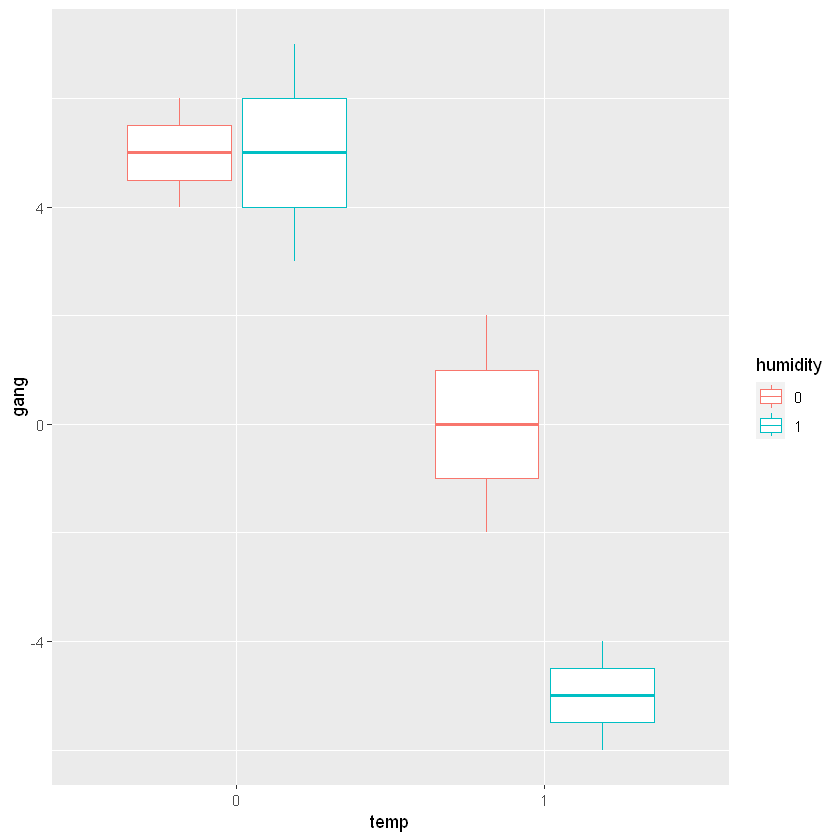

In [14]:
dat %>% ggplot(aes(temp, gang, color = humidity)) + geom_boxplot()

- 두 요인 간 상호작용효과와 습도 B의 주효과는 없으나, 온도 A의 주효과는 큰 것으로 보임
    - A의 경우 $A_0$의 수준에서 강도가 제일 높음

In [15]:
aov.out <- aov(gang ~ temp * humidity)
tidy(aov.out)

term,df,sumsq,meansq,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
temp,1,112.5,112.5,22.5,0.009014481
humidity,1,12.5,12.5,2.5,0.189003658
temp:humidity,1,12.5,12.5,2.5,0.189003658
Residuals,4,20.0,5.0,NA,NA


In [16]:
paste0("A의 주효과의 절댓값 : ",sqrt(112.5/2))
paste0("A의 주효과의 절댓값 : ",sqrt(12.5/2))
paste0("AB의 주효과의 절댓값 : ",sqrt(12.5/2))

[1] "A의 주효과의 절댓값 : 7.5"

[1] "A의 주효과의 절댓값 : 2.5"

[1] "AB의 주효과의 절댓값 : 2.5"

<br>

## 07.04. $2^3$요인배치법

<br>

### 반복이 없는 경우
- **$2^3$요인배치법은 요인의 수가 3개이고, 각 요인의 수준이 2인 삼원배치법**
- 각 요인이 고정요인이면 실험은 $2\times 2\times 2=8$회가 완전히 랜덤한 순서대로 진행

- **$2^3$요인배치법의 처리조합은 정육면체의 꼭지점으로 표현 가능**

<br>

#### 주효과
$$A = {1\over4}(a-1)(b+1)(c+1) = {1\over4}(a+ac+ab+abc-(1)-c-b-bc)={1\over4}(T_{1..}-T_{0..})$$

$$B = {1\over4}(a+1)(b-1)(c+1) = {1\over4}(b+bc+ab+abc-(1)-a-c-ac)={1\over4}(T_{.1.}-T_{.0.})$$

$$C = {1\over4}(a+1)(b+1)(c-1) = {1\over4}(c+ac+bc+abc-(1)-a-b-ab)={1\over4}(T_{..1}-T_{..0})$$

<br>

#### 상호작용효과

$$AB = {1\over4}(a-1)(b-1)(c+1) = {1\over4}(ab+(1)-a-b+abc+c-bc-ac)={1\over4}(T_{11.}+ T_{00.}+T_{01.}-T_{10.})$$

$$AC = {1\over4}(a-1)(b+1)(c-1) = {1\over4}(ac+(1)-a-c+abc+b-ab-bc)={1\over4}(T_{1.1}+ T_{0.0}+T_{0.1}-T_{1.0})$$

$$BC = {1\over4}(a+1)(b-1)(c-1) = {1\over4}(bc+(1)-b-c+abc+a-ab-ac)={1\over4}(T_{.11}+ T_{.00}+T_{.01}-T_{.10})$$


<br>

| 처리조합 | A | B | AB | C| AC|BC|
| - | - | - | - | - | - | - |
| $(1)$ | - | - | + | - | + | + |
| $a$ | + | - | - | - | - | + |
| $b$ | - | + | - | - | + | - |
| $ab$ | + | + | + | - | - | - |
| $c$ | - | - | + | + | - | - |
| $ac$ | + | - | - | + | + | - |
| $bc$ | - | + | - | + | - | + |
| $abc$ | + | + | + | + | + | + |

<br>

#### 변동
- **각 요인의 효과는 대비(contrast)로 볼 수 있으므로**

$$SS_A = 2(A)^2 = {1\over8}(T_{1..}-T_{0..})^2$$

$$SS_B = 2(B)^2 = {1\over8}(T_{.1.}-T_{.0.})^2$$

$$SS_C = 2(C)^2 = {1\over8}(T_{..1}-T_{..0})^2$$

$$SS_{A\times B} = 2(AB)^2 = {1\over8}(T_{11.}+T_{00.}-T_{01.}-T_{10.})^2$$

$$SS_{A\times C} = 2(AC)^2 = {1\over8}(T_{1.1}+T_{0.0}-T_{0.1}-T_{1.0})^2$$

$$SS_{B\times C} = 2(BC)^2 = {1\over8}(T_{.11}+T_{.00}-T_{.01}-T_{.10})^2$$

- 총변동은

$$SS_T = \sum_i \sum_j \sum_k =x^2_{ijk}- {{T^2}\over{8}}$$

- 잔차변동은

$$SS_E = SS_T - SS_A - SS_B - SS_C - SS_{A\times B} - SS_{A\times C}-SS_{B\times C}$$

<br>

#### 예이츠 계산법

| 처리조합 | (1) | (2) | (3)|요인효과<br>(2)/($2^{n-1}$r) | 요인변동<br>$(2)^2$/($2^n$r) |
| - | - | - | - | - |  - |
| (1) | (1) + a| (1)+a+b+ab| abc+bc+ac+c+ab+b+a+(1)| (2)/($2^n$r)=M | CT |
| a | b+ab| a-(1)+ab-b| abc-bc+ac-c+ab-b+a-(1)|(3)/($2^{n-1}$r)=A | $SS_A$ |
| b | a-(1) | b+ab-(1)-a| abc+bc-ac-c+ab+b-a-(1)|(3)/($2^{n-1}$r)=B | $SS_B$ |
| ab | ab-b| ab-b-a+(1)| abc-bc-ac+c+ab-b-a+(1) |(3)/($2^{n-1}$r)=AB | $SS_{A\times B}$ |
| | 
| (1) | (1) + a| (1)+a+b+ab| abc+bc+ac+c-ab-b-a-(1)|(3)/($2^n$r)=M | CT |
| a | b+ab| a-(1)+ab-b| abc-bc+ac-c-ab+b-a+(1)|(3)/($2^{n-1}$r)=AC | $SS_C$ |
| b | a-(1) | b+ab-(1)-a| abc+bc-ac-c-ab-b+a+(1)|(3)/($2^{n-1}$r)=BC | $SS_{A\times C}$ |
| ab | ab-b| ab-b-a+(1)| abc-bc-ac+c-ab+b+a-(1)|(3)/($2^{n-1}$r)=ABC | $SS_{B\times C}$ |

<br>

#### 분산분석표
- 변동이 아주 작은 상호작용효과나, 3요인 상호작용효과를 오차항에 풀링한 후 F검정을 하는 것이 바람직

| 요인 | 제곱합 | 자유도 | 평균제곱 |
| - | - | - | - |
| $A$ | $SS_A$| 1| $MS_A$ |
| $B$ | $SS_B$| 1|  $MS_B$|
| $C$ | $SS_C$| 1|  $MS_C$|
| $A\times$$B$| $SS$$_{A\times B}$| 1|  $MS$$_{A\times B}$|
| $A\times$$C$ | $SS$$_{A\times C}$| 1|  $MS$$_{A\times C}$|
| $B\times$$C$| $SS$$_{B\times C}$| 1|  $MS$$_{B\times C}$|
| $E$(=$A\times$$B\times$$C)$| $SS$$_E$| 1|  $MS_E$|
| |
| $T$ | $SS_T$| 7|  |

<br>

#### 제품강도 예시
- 온도 A, 습도 B, 압력 C 세 요인의 $2^3$요인배치 실험

In [17]:
gang <- c(2, -5, -12, -17, 15, 13, -2, -7)
temp <- factor(rep(c(0, 1), 4))
humidity <- factor(c(rep(0, 4), rep(1, 4)))
pressure <-factor(rep(c(0, 0, 1, 1), 2))
dat = tibble(gang, temp, humidity, pressure)

- **$SS_{A\times B}, SS_{A\times C}$의 효과는 작은 값을 가지므로, 오차항에 풀링 (모형에서 제거)**

In [18]:
tidy(aov(gang ~ temp*humidity*pressure, dat)) %>% 
    mutate(effect = sqrt(sumsq/2))

term,df,sumsq,meansq,effect
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
temp,1,45.125,45.125,4.75
humidity,1,325.125,325.125,12.75
pressure,1,496.125,496.125,15.75
temp:humidity,1,3.125,3.125,1.25
temp:pressure,1,0.125,0.125,0.25
humidity:pressure,1,15.125,15.125,2.75
temp:humidity:pressure,1,3.125,3.125,1.25


- B와 C간 어느정도 상호작용은 존재하지만, 크지 않음

In [19]:
tidy(aov(gang ~ temp + humidity + pressure + humidity:pressure)) %>%
    mutate(effect = ifelse(!is.na(statistic), sqrt(sumsq/2), NA))

term,df,sumsq,meansq,statistic,p.value,effect
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
temp,1,45.125,45.125,21.235294,0.019220053,4.75
humidity,1,325.125,325.125,153.000000,0.001138435,12.75
pressure,1,496.125,496.125,233.470588,0.000608788,15.75
humidity:pressure,1,15.125,15.125,7.117647,0.075826491,2.75
Residuals,3,6.375,2.125,NA,NA,NA


- 온도 A는 $A_0$수준, 습도 B는 $B_1$, 강도 C는 $C_0$수준의 제품의 강도를 가장 높게 하는 조건

In [20]:
dat %>% group_by(temp) %>% summarise(mean(gang))

dat %>% group_by(humidity) %>% summarise(mean(gang))

dat %>% group_by(pressure) %>% summarise(mean(gang))

temp,mean(gang)
<fct>,<dbl>
0,0.75
1,-4.00


humidity,mean(gang)
<fct>,<dbl>
0,-8.00
1,4.75


pressure,mean(gang)
<fct>,<dbl>
0,6.25
1,-9.50


<br>

### 반복이 있는 경우
- 반복이 r회 있는 $2^3$요인배치법은 8r회 실험을 완전랜덤하게 실행
- **각 처리조합에서 반복이 있으므로, 3요인 간의 상호작용효과를 오차와 분리가능**

$$x_{ijkl} = \mu + \alpha_i + \beta_j + \gamma_k + (\alpha \beta)_{ij} + (\alpha \gamma)_{jk}+(\beta \gamma)_{ik}+(\alpha \beta \gamma)_{ijk}+\epsilon_{ijkl}$$

$$l=1, \dots, r$$

<br>

#### 효과와 변동
- 각 요인의 효과는 대비(contrast) 



$$A = {1\over{4r}}(T_{1...}-T_{0...}),\;\;\;SS_A={1\over{8r}}(T_{1...}-T_{0...})=2r(A)^2$$

$$B = {1\over{4r}}(T_{.1..}-T_{.0..}),\;\;\;SS_B={1\over{8r}}(T_{.1..}-T_{.0..})=2r(B)^2$$

$$C = {1\over{4r}}(T_{..1.}-T_{..0.}),\;\;\;SS_C={1\over{8r}}(T_{..1.}-T_{..0.})=2r(C)^2$$


<br>

$$AB = {1\over{4r}}(T_{11..}-T_{00..}),\;\;\;SS_{A\times B}={1\over{8r}}(T_{11..}-T_{00..}-T_{01..}-T_{10..})^2$$

$$AC = {1\over{4r}}(T_{1.1.}-T_{0.0.}),\;\;\;SS_{A\times C}={1\over{8r}}(T_{1.1.}-T_{0.0.}-T_{0.1.}-T_{1.0.})^2$$

$$BC = {1\over{4r}}(T_{.11.}-T_{.00.}),\;\;\;SS_{B\times C}={1\over{8r}}(T_{.11.}-T_{.00.}-T_{.01.}-T_{.10.})^2$$

<br>

$$ABC = {1\over{4r}}(-(1)+a+b-ab+c-ac-bc+abc),\;\;\;SS_{A\times B\times C}={1\over{8r}}(T_{111.}+T_{100.}+T_{010.}+T_{001.}-T_{011.}-T_{101.}-T_{110.}-T_{000.})^2$$

- 총변동은

$$SS_T = \sum_i \sum_j \sum_k \sum_l x^2_{ijkl}-CT$$

- 오차변동은

$$SS_E = SS_T - (SS_A+SS_B+SS_C+SS_{A\times B}+SS_{A\times C}+SS_{B\times C}+SS_{A\times B\times C})$$

<br>

#### 분산분석표


| 요인 | 제곱합 | 자유도 | 평균제곱 |
| - | - | - | - |
| $A$ | $SS_A$| 1| $MS_A$ |
| $B$ | $SS_B$| 1|  $MS_B$|
| $C$ | $SS_C$| 1|  $MS_C$|
| $A\times$$B$| $SS$$_{A\times B}$| 1|  $MS$$_{A\times B}$|
| $A\times$$C$ | $SS$$_{A\times C}$| 1|  $MS$$_{A\times C}$|
| $B\times$$C$| $SS$$_{B\times C}$| 1|  $MS$$_{B\times C}$|
| $A\times$$B\times$$C$| $SS$$_{A\times B\times C}$| 1|  $MS$$_{A\times B\times C}$|
| $E$| $SS$$_E$| 8(r-1)|  $MS_E$|
| |
| $T$ | $SS_T$| 8r-1|  |

<br>

## 07.05. $2^n$요인배치법

- 요인의 수가 n개이고 각 요인의 수준수가 2인 경우

    실험횟수가 $2^n$이고, 각 처리의 조합에서 실험이 r회 반복된다면 총실험횟수는 $r\times 2^n$회


<br>

| 처리조합 | A | B | AB | C| AC|BC|
| - | - | - | - | - | - | - |
| $(1)$ | - | - | + | - | + | + |
| $a$ | + | - | - | - | - | + |
| $b$ | - | + | - | - | + | - |
| $ab$ | + | + | + | - | - | - |
| $c$ | - | - | + | + | - | - |
| $ac$ | + | - | - | + | + | - |
| $bc$ | - | + | - | + | - | + |
| $abc$ | + | + | + | + | + | + |

와 같이 **주효과의 열은 그 주효과와 같은문자를 포함하는 행에 '+'를, 나머지에는 '-'를 표시**

<br>

**상호작용효과의 열은 그 상호작용효과를 구성하는 요인의 주효과에 '+', 나머지에는 '-'를 표시**

<br>

#### 효과
- **구하고자하는 요인에 해당하는 곳은 -1, 해당하지 않는 곳은 +1을 넣어 계산**
- 예를 들어

    $$AC = {1\over8}(a-1)(b+1)(c-1)(d+1)$$
    
    $$={1\over8}((1)+b+d+ac+bd+abc+acd+abcd-a-ab-ad-abd-bc-bcd-c-cd)$$
    
<br>

#### 변동

- **각 요인의 변동은 각 요인효과를 대비로 볼 수 있으므로**

    $$요인변동=2^{n-2}r(요인효과)^2$$가 성립
    
    예를 들어
    
    $$AC={1\over{8r}}(T_{1.1..} + T_{010..}-T_{1.0..}-T_{0.1..})$$이 되고, 그 변동은
    
    $$SS_{A\times C}={1\over{16r}}(T_{1.1..} + T_{010..}-T_{1.0..}-T_{0.1..})^2$$

<br>

#### 분산분석표
- 오차항 위에 나열된 모든 요인의 자유도의 합은 $r=1$인 경우

| | 요인 | 자유도 |
| - | - | - |
| 주효과 | A<br>B<br>$\vdots$ | $\begin{pmatrix}1\\1\\\vdots\end{pmatrix}$n$C_1$=$n$ |
| |
| 2요인 상호작용효과 | AB<br>AC<br>$\vdots$ | $\begin{pmatrix}1\\1\\\vdots\end{pmatrix}$n$C_2$ |
| |
| 3요인 상호작용효과 | ABC<br>ABD<br>$\vdots$ | $\begin{pmatrix}1\\1\\\vdots\end{pmatrix}$n$C_3$ |
| |
| n요인 상호작용효과 | ABCD<br>$\vdots$ | $\begin{pmatrix}1\\1\\\vdots\end{pmatrix}$n$C_n$=1 |
| |
| 오차 | E | $2^n$(n-1)|
| | 
| 총 | T | r$2^n$-1|

<br>

#### 그러나 일반적으로 3요인 이상의 상호작용효과는 실질적인 의미가 적음

<br>

#### 제품강도 예시
- 온도 A, 습도 B, 압력 C, 진동 D 네 요인의 $2^4$요인배치 실험

In [41]:
strength <- c(-1, 5, 9, 11, 0, 3, 4, 8, -1, -9, 1, -5, -9, -13, 5, -4)
temp <- rep(c(rep(-1, 4), rep(1, 4)), 2) %>% factor
humid <- rep(c(-1, -1, 1, 1), 4) %>% factor
press <- rep(c(-1, 1), 8) %>% factor
vib <- c(rep(-1, 8), rep(1, 8)) %>% factor

order = sample(16) # 전체 실험 랜덤화
dat = data.frame(strength, temp, humid, press, vib, order)

- 정규성 검정 : 정규분포 만족

In [42]:
shapiro.test(strength)


	Shapiro-Wilk normality test

data:  strength
W = 0.97048, p-value = 0.8463


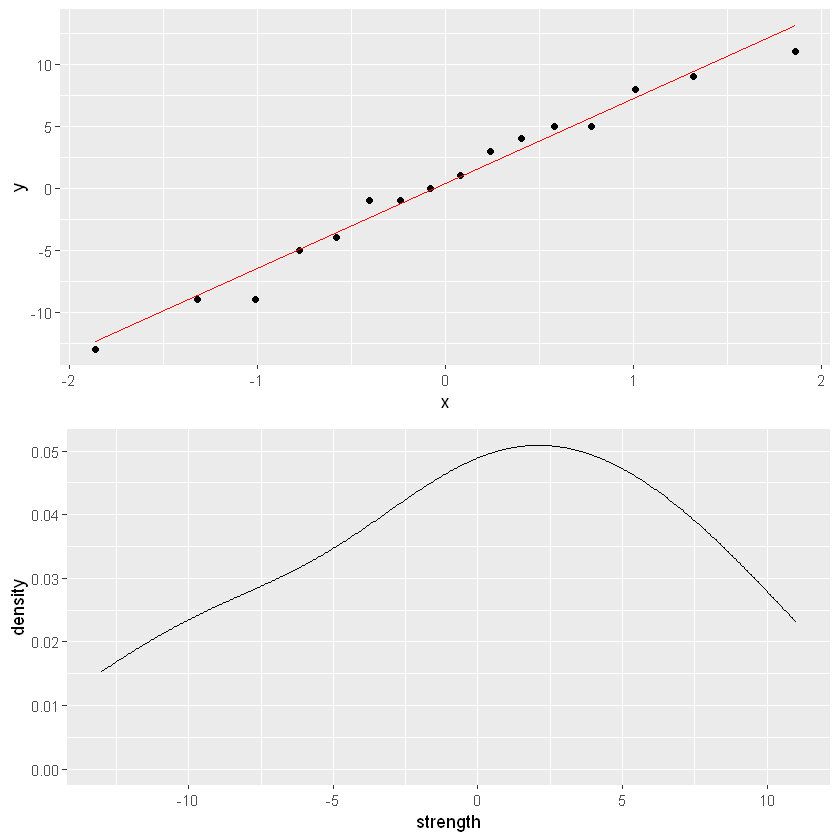

In [43]:
p1 <- dat %>% ggplot(aes(sample = strength)) + stat_qq() + stat_qq_line(color = "red")
p2 <- dat %>% ggplot() + geom_density(aes(x = strength))
gridExtra::grid.arrange(p1, p2)

- vib의 효과가 가장 크고, humidity가 그 다음으로 크다고 추정

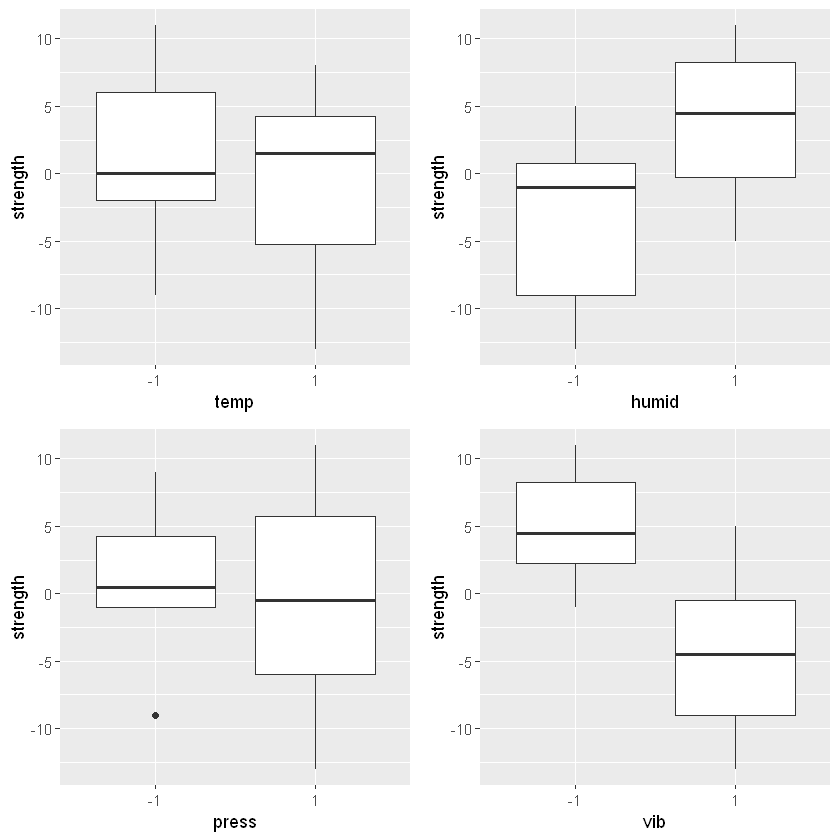

In [44]:
p1 <-dat %>% ggplot(aes(temp,strength)) + geom_boxplot() 
p2 <-dat %>% ggplot(aes(humid,strength)) + geom_boxplot() 
p3 <-dat %>% ggplot(aes(press,strength)) + geom_boxplot() 
p4 <-dat %>% ggplot(aes(vib,strength)) + geom_boxplot() 
gridExtra::grid.arrange(p1, p2, p3, p4, nrow =2)

<br>

- 유의한 효과 없음

In [45]:
upto3 = aov(strength ~ (temp + humid + press + vib)^3, data = dat)
tidy(upto3)

term,df,sumsq,meansq,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
temp,1,1.600000e+01,1.600000e+01,1.777778e+00,0.4096655
humid,1,1.822500e+02,1.822500e+02,2.025000e+01,0.1392090
press,1,9.000000e+00,9.000000e+00,1.000000e+00,0.5000000
vib,1,3.422500e+02,3.422500e+02,3.802778e+01,0.1023447
temp:humid,1,6.250000e+00,6.250000e+00,6.944444e-01,0.5577159
temp:press,1,1.972152e-31,1.972152e-31,2.191280e-32,1.0000000
temp:vib,1,2.500000e-01,2.500000e-01,2.777778e-02,0.8948631
humid:press,1,2.250000e+00,2.250000e+00,2.500000e-01,0.7048328
humid:vib,1,1.000000e+00,1.000000e+00,1.111111e-01,0.7951672


<br>

- AIC에 근거한 단계적 회귀

In [ ]:
sreg = step(upto3, direction = "backward")
summary(sreg)

```plaintext
               Df Sum Sq Mean Sq F value   Pr(>F)
temp            1   16.0    16.0   8.421 0.033716 *
humid           1  182.2   182.2  95.921 0.000189 ***
press           1    9.0     9.0   4.737 0.081479 .
vib             1  342.3   342.3 180.132 4.11e-05 ***
temp:humid      1    6.2     6.2   3.289 0.129456
temp:vib        1    0.2     0.2   0.132 0.731630
humid:press     1    2.2     2.2   1.184 0.326151
humid:vib       1    1.0     1.0   0.526 0.500680
press:vib       1  110.2   110.2  58.026 0.000620 ***
temp:humid:vib  1   36.0    36.0  18.947 0.007339 **
Residuals       5    9.5     1.9
```

In [47]:
redmod = aov(strength ~ temp + humid + press + vib + press:vib + temp:humid:vib)
tidy(redmod)

term,df,sumsq,meansq,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
temp,1,16.00,16.000000,8.170213,2.886369e-02
humid,1,182.25,182.250000,93.063830,7.106861e-05
press,1,9.00,9.000000,4.595745,7.575514e-02
vib,1,342.25,342.250000,174.765957,1.157271e-05
press:vib,1,110.25,110.250000,56.297872,2.898877e-04
temp:humid:vib,4,43.50,10.875000,5.553191,3.233801e-02
Residuals,6,11.75,1.958333,NA,NA


- 전체 분산 중 모델로 설명되는 변동의 비율

In [48]:
summary.lm(redmod)$adj.r.squared

[1] 0.9589161

<br>

**각 효과의 유의확률이 아닌, 각 효과의 값(크기)로 중요성을 판단**

1. 모든효과를 포함하는 모델 생성

In [50]:
q = aov(strength ~ (temp + humid + press + vib)^4, data = dat)

-효과를 크기순으로 나열

In [56]:
qef = q$effects[-1]
sef = qef[order(qef)]

- 정규확률지에서 이론적인 quantile 계산

In [58]:
ip = ppoints(length(sef))
zp = qnorm(ip)

- 정규확률지에서 수평선에서 많이 벗어난 것이 효과가 큼, 적합된 직선에서 벗어날 수록 효과가 큼 
    - 진동 D와 습도 B의 효과가 가장 큼

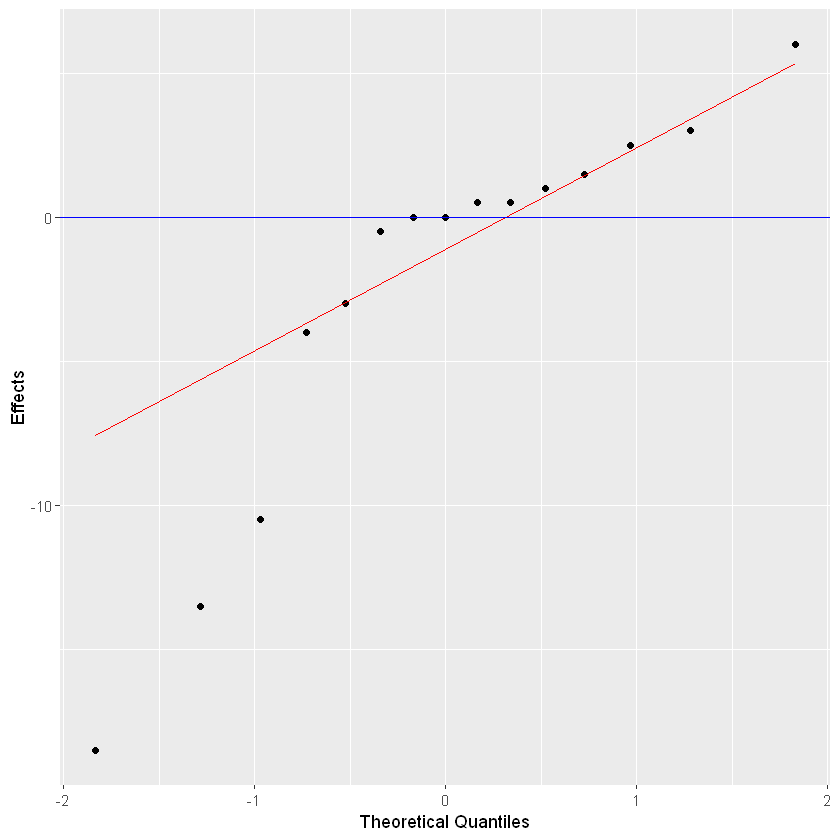

In [71]:
tibble(zp, sef) %>% ggplot(aes(zp, sef)) + geom_point() + 
    stat_qq_line(aes(sample = sef), color = "red") + geom_hline(yintercept = 0, color = "blue") +
    xlab("Theoretical Quantiles") + ylab("Effects")

<br>

## 07.03 $3^2$ 요인배치법
- 요인수가 2개이고, 각 요인의 수가 3인 이원배치법

<br>

### 반복이 없는 경우

- 요인 A는 수준수가 3이므로, 자유도는 2가 되고

    $SS_A$는 2개의 직교하는 대비에 의한 변동으로 분해될 수 잇음
    
- 만약 요인 A가 계량요인이고, 수준간 간격이 일정할 때는

    $SS_A$를 요인의 1차효과 (linear effect)와 2차효과 (quadratic effect)에 의한 변동으로 분해하는 것도 유익
    
    $$SS_A = SS_l + SS_q$$
    
<br>

### 반복이 있는 경우
- 반복이 r회인 $3^r$요인배치법에서, 실험은 $3\times3\times r=9r$회를 랜덤한 순서로 실시

<br>

- 만약 요인 A가 계량요인이고, 수준간 간격이 일정할 때는

    $SS_A$를 요인의 1차효과 (linear effect)와 2차효과 (quadratic effect)에 의한 변동으로 분해하며, 마찬가지로
    
    $$SS_A = SS_l + SS_q$$가 성립

<br>

## 07.07. 회귀모형

<br>

### $2^2$요인배치의 경우

<br>

#### 팝콘예시
- 가열시간 A : $A_0, A_2$
- 알맹이종류 B : $B_0, B_1$

<br>

#### **각 회귀계수는 각 요인의 효과**
- 상호작용효과의 계수가 A, B의 주효과보다 작음

In [79]:
A <- B <- c(-1, 1)
design <- expand.grid(A = A, B = B)
A <- design$A; B <- design$B
y <- c(52, 74, 62, 80)

In [80]:
popped_cornM1 <- lm(y ~ A*B)
tidy(popped_cornM1)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),67,NaN,NaN,NaN
A,10,NaN,NaN,NaN
B,4,NaN,NaN,NaN
A:B,-1,NaN,NaN,NaN


<br>

- 상호작용효과 제거
    - 모든 회귀계수 (효과)유의
    - 이전 모형과 효과의 변화가 없음

In [82]:
popped_cornM2 <- lm(y ~ A + B)
tidy(popped_cornM2)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),67,1,67,0.009501082
A,10,1,10,0.063451035
B,4,1,4,0.155958261


<br>

### $2^4$요인배치의 경우

In [93]:
strength <- c(-1, 5, 9, 11, 0, 3, 4, 8, -1, -9, 1, -5, -9, -13, 5, -4)
temp <- rep(c(rep(-1, 4), rep(1, 4)), 2)
humid <- rep(c(-1, -1, 1, 1), 4)
press <- rep(c(-1, 1), 8)
vib <- c(rep(-1, 8), rep(1, 8))

dat = data.frame(strength, temp, humid, press, vib)

<br>

- 절댓값 1을 기준으로, $x_1, x_2, x_4, x_3x_4, x_1x_2x_4$의 효과가 유의

In [94]:
linear.mod1 <- lm(strength ~ (temp + humid + press + vib)^4, dat)
tidy(linear.mod1)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2.500000e-01,NaN,NaN,NaN
temp,-1.000000e+00,NaN,NaN,NaN
humid,3.375000e+00,NaN,NaN,NaN
press,-7.500000e-01,NaN,NaN,NaN
vib,-4.625000e+00,NaN,NaN,NaN
temp:humid,6.250000e-01,NaN,NaN,NaN
temp:press,-4.874573e-16,NaN,NaN,NaN
temp:vib,1.250000e-01,NaN,NaN,NaN
humid:press,-3.750000e-01,NaN,NaN,NaN


<br>



In [96]:
linear.mod2 <- lm(strength ~ (temp + humid + press + vib)^3, dat)
eff_df <- tidy(linear.mod2); eff_df

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2.500000e-01,0.75,3.333333e-01,0.7951672
temp,-1.000000e+00,0.75,-1.333333e+00,0.4096655
humid,3.375000e+00,0.75,4.500000e+00,0.1392090
press,-7.500000e-01,0.75,-1.000000e+00,0.5000000
vib,-4.625000e+00,0.75,-6.166667e+00,0.1023447
temp:humid,6.250000e-01,0.75,8.333333e-01,0.5577159
temp:press,-4.041906e-16,0.75,-5.389208e-16,1.0000000
temp:vib,1.250000e-01,0.75,1.666667e-01,0.8948631
humid:press,-3.750000e-01,0.75,-5.000000e-01,0.7048328


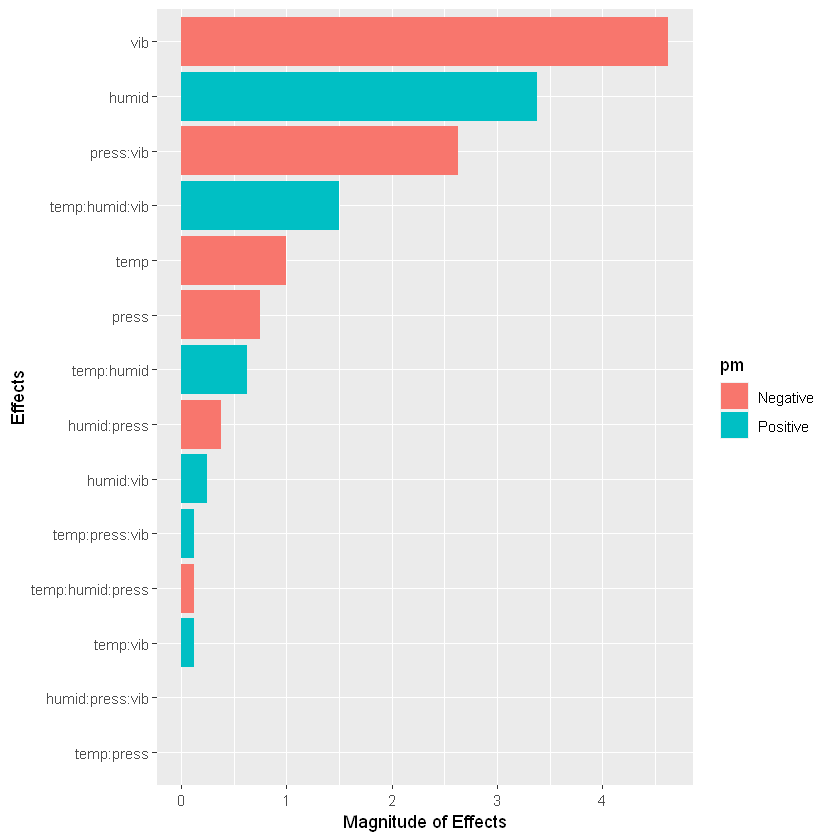

In [135]:
eff_df %>% select(term ,estimate) %>% 
    mutate(pm = ifelse(estimate >= 0, "Positive", "Negative"),
           estimate = abs(estimate)) %>%
    filter(term != "(Intercept)") %>% 
    ggplot(aes(fct_reorder(term, rank((abs(estimate)))), estimate, fill = pm)) + 
    geom_col() + xlab("Effects") + ylab("Magnitude of Effects") + coord_flip()